In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
pr = pd.read_csv('credit_card_default_TRAIN.csv')
pr.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [52]:
df = pd.read_csv('credit_card_default_TRAIN.csv', index_col = 0, header = 1)

In [53]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [54]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [55]:
df.count()

LIMIT_BAL                     22500
SEX                           22500
EDUCATION                     22500
MARRIAGE                      22500
AGE                           22500
PAY_0                         22500
PAY_2                         22500
PAY_3                         22500
PAY_4                         22500
PAY_5                         22500
PAY_6                         22500
BILL_AMT1                     22500
BILL_AMT2                     22500
BILL_AMT3                     22500
BILL_AMT4                     22500
BILL_AMT5                     22500
BILL_AMT6                     22500
PAY_AMT1                      22500
PAY_AMT2                      22500
PAY_AMT3                      22500
PAY_AMT4                      22500
PAY_AMT5                      22500
PAY_AMT6                      22500
default payment next month    22500
dtype: int64

In [56]:
df.dropna()
df.count()

LIMIT_BAL                     22500
SEX                           22500
EDUCATION                     22500
MARRIAGE                      22500
AGE                           22500
PAY_0                         22500
PAY_2                         22500
PAY_3                         22500
PAY_4                         22500
PAY_5                         22500
PAY_6                         22500
BILL_AMT1                     22500
BILL_AMT2                     22500
BILL_AMT3                     22500
BILL_AMT4                     22500
BILL_AMT5                     22500
BILL_AMT6                     22500
PAY_AMT1                      22500
PAY_AMT2                      22500
PAY_AMT3                      22500
PAY_AMT4                      22500
PAY_AMT5                      22500
PAY_AMT6                      22500
default payment next month    22500
dtype: int64

In [57]:
# Turns out there is no NAN values. We are good

### Initiating Exploratory Data Analysis

In [58]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,163424.608000,1.610178,1.840667,1.564133,35.212889,0.015067,-0.106978,-0.137422,-0.197333,-0.237067,...,42008.863511,39750.329956,38353.361956,5495.471067,5.784070e+03,4870.560533,4692.143200,4694.131200,5088.028222,0.226133
std,128515.245979,0.487721,0.775181,0.521311,9.307266,1.119824,1.197125,1.202637,1.164344,1.137459,...,62189.619882,59596.457496,58733.356897,15087.642904,2.113294e+04,15959.242382,14823.164919,15023.608194,17300.349898,0.418336
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1795.750000,1243.750000,1000.000000,7.980000e+02,367.000000,270.000000,247.000000,56.000000,0.000000
50%,135000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19051.000000,18259.500000,17175.000000,2098.000000,2.000000e+03,1676.000000,1500.000000,1500.000000,1463.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51814.500000,49635.500000,48739.750000,5000.000000,5.000000e+03,4193.750000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


In [59]:
#Changing a few variables as per model

In [60]:
df.EDUCATION.value_counts()

2    10634
1     7982
3     3581
5      184
4       76
6       33
0       10
Name: EDUCATION, dtype: int64

In [61]:
#Turning 0,5 and 6 to 4

In [62]:
# Cool

In [63]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [64]:
# Changing the category

In [65]:
df.EDUCATION[df.EDUCATION==0]=4
df.EDUCATION[df.EDUCATION==5]=4
df.EDUCATION[df.EDUCATION==6]=4
df.EDUCATION.unique()

array([2, 1, 3, 4])

In [66]:
# Looking at marriage

In [67]:
df.MARRIAGE.value_counts()

2    12219
1     9990
3      255
0       36
Name: MARRIAGE, dtype: int64

In [68]:
# We have to turn the 0 to 3 as others

In [69]:
df.MARRIAGE[df.MARRIAGE==0]=3
df.MARRIAGE.unique()

array([1, 2, 3])

In [70]:
#Checking gender

In [71]:
df.SEX.value_counts()

2    13729
1     8771
Name: SEX, dtype: int64

In [72]:
# Everything here is fine

In [73]:
# Checking for values less than zero

In [74]:
df.AGE[df.AGE<0].count(),
df.LIMIT_BAL[df.LIMIT_BAL<0].count()


0

In [75]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [76]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [77]:
df = df.rename(columns = {'default payment next month':'DEFAULTER'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [78]:
# Checking for correlation

In [79]:
df.rank()
df.corr('kendall')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
LIMIT_BAL,1.000000,0.042360,-0.218831,-0.091684,0.138457,-0.221302,-0.267307,-0.258408,-0.236348,-0.219645,...,0.078715,0.082506,0.086060,0.205397,0.210574,0.209522,0.209906,0.220683,0.242248,-0.137325
SEX,0.042360,1.000000,0.009664,-0.016639,-0.112198,-0.042462,-0.057749,-0.055164,-0.047645,-0.042918,...,-0.014341,-0.009151,-0.004325,-0.006829,0.009900,0.020253,0.013828,0.013846,0.027045,-0.038250
EDUCATION,-0.218831,0.009664,1.000000,-0.141197,0.113445,0.118621,0.156551,0.147387,0.138216,0.123468,...,0.052282,0.044142,0.043724,-0.035071,-0.037561,-0.033420,-0.037469,-0.043547,-0.044968,0.042814
MARRIAGE,-0.091684,-0.016639,-0.141197,1.000000,-0.382563,0.015477,0.028598,0.031479,0.033758,0.038298,...,-0.000518,-0.000753,0.001158,-0.006243,-0.014471,-0.009990,-0.012114,-0.010709,-0.012917,-0.033978
AGE,0.138457,-0.112198,0.113445,-0.382563,1.000000,-0.045610,-0.061968,-0.061873,-0.060752,-0.061400,...,-0.000010,0.002970,0.002406,0.026242,0.032919,0.023190,0.029722,0.026534,0.026917,0.000155
PAY_0,-0.221302,-0.042462,0.118621,0.015477,-0.045610,1.000000,0.591893,0.497750,0.462168,0.429620,...,0.225393,0.220240,0.213081,-0.086448,-0.058749,-0.044091,-0.028142,-0.027676,-0.042393,0.268639
PAY_2,-0.267307,-0.057749,0.156551,0.028598,-0.061968,0.591893,1.000000,0.759406,0.664311,0.621265,...,0.378533,0.363673,0.349053,0.009829,0.055525,0.066404,0.070316,0.069340,0.055858,0.200409
PAY_3,-0.258408,-0.055164,0.147387,0.031479,-0.061873,0.497750,0.759406,1.000000,0.759703,0.666637,...,0.407530,0.388630,0.371298,0.169350,0.015649,0.077629,0.093094,0.089902,0.069546,0.180426
PAY_4,-0.236348,-0.047645,0.138216,0.033758,-0.060752,0.462168,0.664311,0.759703,1.000000,0.788951,...,0.469423,0.439888,0.416169,0.144750,0.194422,0.051022,0.115847,0.121398,0.109947,0.160779
PAY_5,-0.219645,-0.042918,0.123468,0.038298,-0.061400,0.429620,0.621265,0.666637,0.788951,1.000000,...,0.512428,0.487641,0.452537,0.130840,0.170728,0.205333,0.076901,0.139404,0.128950,0.153112


In [80]:
cor = df.corr('kendall')

In [81]:
print(cor.DEFAULTER)

LIMIT_BAL   -0.137325
SEX         -0.038250
EDUCATION    0.042814
MARRIAGE    -0.033978
AGE          0.000155
PAY_0        0.268639
PAY_2        0.200409
PAY_3        0.180426
PAY_4        0.160779
PAY_5        0.153112
PAY_6        0.134341
BILL_AMT1   -0.021776
BILL_AMT2   -0.012645
BILL_AMT3   -0.010292
BILL_AMT4   -0.004332
BILL_AMT5   -0.003732
BILL_AMT6    0.002053
PAY_AMT1    -0.131729
PAY_AMT2    -0.123759
PAY_AMT3    -0.105946
PAY_AMT4    -0.106272
PAY_AMT5    -0.096832
PAY_AMT6    -0.101168
DEFAULTER    1.000000
Name: DEFAULTER, dtype: float64


In [82]:
# USING A GENERAL FINANCIAL THEOREM

 https://www.kaggle.com/pratjain/project-credit-default-prediction?scriptVersionId=59476322&cellId=42

### RATIO = (BILL AMOUNT - AMOUNT PAID)/CREDIT LIMIT

In [83]:
df['BILL_PAY_RATIO1'] = (df['BILL_AMT1']-df['PAY_AMT1'])/df['LIMIT_BAL']
df['BILL_PAY_RATIO2'] = (df['BILL_AMT2']-df['PAY_AMT2'])/df['LIMIT_BAL']
df['BILL_PAY_RATIO3'] = (df['BILL_AMT3']-df['PAY_AMT3'])/df['LIMIT_BAL']
df['BILL_PAY_RATIO4'] = (df['BILL_AMT4']-df['PAY_AMT4'])/df['LIMIT_BAL']
df['BILL_PAY_RATIO5'] = (df['BILL_AMT5']-df['PAY_AMT5'])/df['LIMIT_BAL']
df['BILL_PAY_RATIO6'] = (df['BILL_AMT6']-df['PAY_AMT6'])/df['LIMIT_BAL']


In [84]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,BILL_PAY_RATIO1,BILL_PAY_RATIO2,BILL_PAY_RATIO3,BILL_PAY_RATIO4,BILL_PAY_RATIO5,BILL_PAY_RATIO6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [85]:
# I wanted to show only the ratios under the correlation table

In [86]:
df.rank()
cor = df.corr('kendall')
print(cor.DEFAULTER)

LIMIT_BAL         -0.137325
SEX               -0.038250
EDUCATION          0.042814
MARRIAGE          -0.033978
AGE                0.000155
PAY_0              0.268639
PAY_2              0.200409
PAY_3              0.180426
PAY_4              0.160779
PAY_5              0.153112
PAY_6              0.134341
BILL_AMT1         -0.021776
BILL_AMT2         -0.012645
BILL_AMT3         -0.010292
BILL_AMT4         -0.004332
BILL_AMT5         -0.003732
BILL_AMT6          0.002053
PAY_AMT1          -0.131729
PAY_AMT2          -0.123759
PAY_AMT3          -0.105946
PAY_AMT4          -0.106272
PAY_AMT5          -0.096832
PAY_AMT6          -0.101168
DEFAULTER          1.000000
BILL_PAY_RATIO1    0.072695
BILL_PAY_RATIO2    0.084527
BILL_PAY_RATIO3    0.085049
BILL_PAY_RATIO4    0.092641
BILL_PAY_RATIO5    0.090624
BILL_PAY_RATIO6    0.094037
Name: DEFAULTER, dtype: float64


In [87]:
print(cor.DEFAULTER[-6:-1])

BILL_PAY_RATIO1    0.072695
BILL_PAY_RATIO2    0.084527
BILL_PAY_RATIO3    0.085049
BILL_PAY_RATIO4    0.092641
BILL_PAY_RATIO5    0.090624
Name: DEFAULTER, dtype: float64


### Running a Logistic Regression Model

In [88]:
# First doing relational analysis

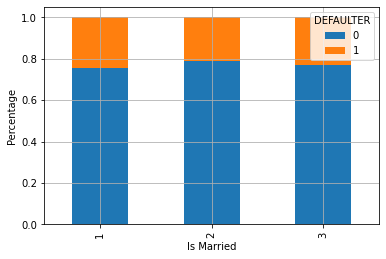

In [89]:
# Create cross tabulation
crosstab = pd.crosstab(df['MARRIAGE'], df['DEFAULTER'])

# Sum the columns
sumcolumns = crosstab.sum(1).astype(float)

# Compute the percentages
crosstab = crosstab.div(sumcolumns, axis=0)

# Plot
crosstab.plot(kind='bar', stacked=True, grid = True)
plt.xlabel('Is Married')
plt.ylabel('Percentage')
plt.show()

As you can see single (represented as 1) and divorced(represented as 3) are more likely to become credit defaulters than customers who are married.

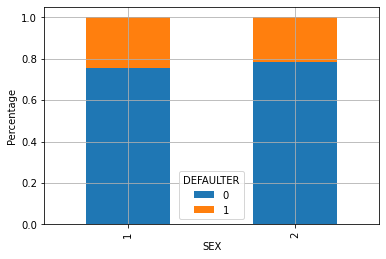

In [90]:
crosstab = pd.crosstab(df['SEX'], df['DEFAULTER'])

# Sum the columns
sumcolumns = crosstab.sum(1).astype(float)

# Compute the percentages
crosstab = crosstab.div(sumcolumns, axis=0)

# Plot
crosstab.plot(kind='bar', stacked=True, grid = True)
plt.xlabel('SEX')
plt.ylabel('Percentage')
plt.show()

As you can see males(1) have a higher default rate than females(2).

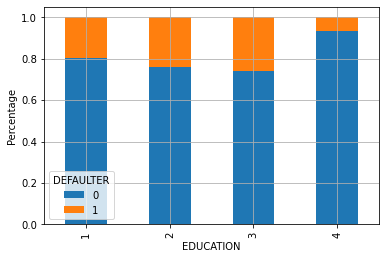

In [91]:
crosstab = pd.crosstab(df['EDUCATION'], df['DEFAULTER'])

# Sum the columns
sumcolumns = crosstab.sum(1).astype(float)

# Compute the percentages
crosstab = crosstab.div(sumcolumns, axis=0)

# Plot
crosstab.plot(kind='bar', stacked=True, grid = True)
plt.xlabel('EDUCATION')
plt.ylabel('Percentage')
plt.show()

As you can see people who are in highschool(3) and university(2) are more likely to be defaulters than people in graduate school(1). Furthermore, 4 represents people who didnot graduate highschool. These people are less likely to be defaulters because they may not be eligible for a credit card.

### Using random forest

In [92]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULTER',
       'BILL_PAY_RATIO1', 'BILL_PAY_RATIO2', 'BILL_PAY_RATIO3',
       'BILL_PAY_RATIO4', 'BILL_PAY_RATIO5', 'BILL_PAY_RATIO6'],
      dtype='object')

In [93]:
dfX = df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_PAY_RATIO1', 'BILL_PAY_RATIO2', 'BILL_PAY_RATIO3', 'BILL_PAY_RATIO4', 'BILL_PAY_RATIO5', 'BILL_PAY_RATIO6']]

# Choose column to predict
dfY = df['DEFAULTER']

In [99]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfVIF = add_constant(dfX)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

,0
const,63.940169
SEX,1.031429
EDUCATION,1.077709
MARRIAGE,1.221331
AGE,1.263072
BILL_PAY_RATIO1,3.857341
BILL_PAY_RATIO2,4.467548
BILL_PAY_RATIO3,4.512459
BILL_PAY_RATIO4,4.103455
BILL_PAY_RATIO5,4.176147


Variance inflation is less than 10, therefore the model is ready to run and will give good results

In [94]:
from sklearn.model_selection import train_test_split

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.33, random_state=0)

In [95]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators = 300, min_samples_split = 5)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [96]:
# Check# Check for accuracy
Y_predicted = randomforest.predict(X_test)
randomforest.score(X_test, Y_test)

0.7776430976430977

### Our random tree machine learning model using the given variables is 78% accurate.

In [98]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5789
           1       0.48      0.09      0.15      1636

    accuracy                           0.78      7425
   macro avg       0.63      0.53      0.51      7425
weighted avg       0.72      0.78      0.71      7425

